In [1]:
from rtgemlib import RTGEM
from rtgemlib import sample_from_tgem, LogLikelihood, scoreBic, mle_lambdas, LocaleLogLikelihood, get_count_duration_df,\
get_nodes_pcv_from_data, get_node_pcv_from_data, get_node_LogLikelihood, set_pcv_lambda_t, backward_neighbors_gen,\
compute_logLikelihood, backwardSearch

from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# first key is the child, second key is ur moma
model_AB = {
    'B':
    {
        'timescales': {'A': [[1, 2]], 'B': [[5, 6]]},
        'lambdas': {
            (0, 0): 0.6,
            (0, 1): 1.6,
            (1, 0): 3,
            (1, 1): 1
        }
    },
    'A': {
        'timescales': {'B': [[2, 3]]},
        'lambdas': {
            (0,): 0.5,
            (1,): 1
        }
    }
#     'C': {
#         'timescales': {'C': [[2, 3]]},
#         'lambdas': {
#             (0,): 0.5,
#             (1,): 1
#         }
#     },
#     'D': {
#         'timescales': {},
#         'lambdas': {(): 2}
#     }
}

In [3]:
def empty_nodes(nodes):
    return dict(zip(nodes, [{'timescales': {}, 'lambdas': {(): 1}}] * len(nodes)))

In [4]:
gms = RTGEM(model_AB)
sampled_data = sample_from_tgem(gms, t_min=0, t_max=50)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.08s/it]


In [5]:
gms_rd = RTGEM(empty_nodes(list(model_AB.keys())))
gms_rd.random_walk(max_depth=30, t_n=50)
mle_lambdas(model=gms_rd, data=sampled_data)

100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 243.84it/s]


,event,pcv,lambda_t,duration,count
0,A,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.349675,48.616529,17
0,B,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)",0.628116,49.353922,31
1,B,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.628116,49.353922,31
1,A,"(1, 0, 0, 0, 0, 1, 0, 0, 0, 0)",0.349675,48.616529,17
4,B,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0)",0.628116,49.353922,31
2,A,"(1, 0, 0, 0, 0, 1, 1, 0, 0, 0)",0.349675,48.616529,17
6,B,"(1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.628116,49.353922,31
4,A,"(1, 1, 0, 0, 0, 1, 1, 1, 0, 0)",0.349675,48.616529,17
7,B,"(1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0)",0.628116,49.353922,31
8,B,"(1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.628116,49.353922,31


In [6]:
list(gms_rd.dpd_graph.edges.data())

[('B',
  'B',
  {'timescales': [[0, 5.0],
    [5.0, 6.25],
    [6.25, 7.5],
    [7.5, 10],
    [10, 20],
    [20, 25.0],
    [25.0, 30.0],
    [30.0, 35.0],
    [35.0, 40]]}),
 ('B',
  'A',
  {'timescales': [[0, 5.0], [5.0, 10], [10, 15.0], [15.0, 20], [20, 40]]}),
 ('A',
  'A',
  {'timescales': [[0, 10], [10, 20], [20, 25.0], [25.0, 30.0], [30.0, 40]]}),
 ('A',
  'B',
  {'timescales': [[0, 2.5],
    [2.5, 5.0],
    [5.0, 7.5],
    [7.5, 8.75],
    [8.75, 10],
    [10, 20],
    [20, 40]]})]

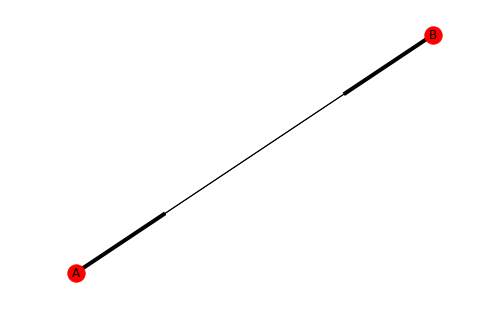

In [7]:
nx.draw(gms_rd.dpd_graph, with_labels=True)
plt.show()

In [8]:
list(gms.dpd_graph.edges.data())

[('B', 'B', {'timescales': [[5, 6]]}),
 ('B', 'A', {'timescales': [[2, 3]]}),
 ('A', 'B', {'timescales': [[1, 2]]})]

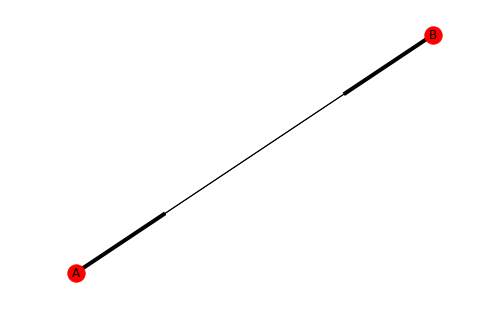

In [9]:
nx.draw(gms.dpd_graph, with_labels=True)
plt.show()

In [10]:
scoreBic(model=gms, observed_data=sampled_data)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Users\MOTALY\Desktop\pred\dev\GMEs_experiments\rtgemlib\learning.py:24: PerformanceWarning: indexing past lexsort depth may impact performance.
  lambda lm: data_idx.loc[(lm['event'], lm[lambda_col])].shape[0], axis=1)


-288.52978662826166

In [11]:
scoreBic(model=gms_rd, observed_data=sampled_data)

-258578.72786330784

In [12]:
# def backwardSearch(model, data):
#     set_pcv_lambda_t(model, data)
#     lambdas_count_duration_df = get_count_duration_df(data)

#     LogL = compute_logLikelihood(lambdas_count_duration_df)
#     log_td = np.log(data.iloc[-1]['time'] - data.iloc[0]['time'])

#     size_log_td = model.size() * log_td
    
#     score = LogL - size_log_td
#     local_maximum = False
    
#     it = 0
#     while not local_maximum:
#     #     max_ngbr_score = -np.inf
#         local_maximum = True
#         print('iteration number: {}: scoreBIC = {}'.format(it, score))

#         for ngbr_info in tqdm(backward_neighbors_gen(model, data, lambdas_count_duration_df,\
#                                                  LogL, size_log_td, log_td)):

#             inverse_op, args, LogL_ngbr, size_log_td_ngbr, changed_node_cnt_drt_df = ngbr_info
#             score_ngbr = LogL_ngbr - size_log_td_ngbr

#             if score_ngbr > score:
#                 print('max ngbr {}, args={} '.format(inverse_op, args))
#                 inverse_op(*args)
#                 LogL = LogL_ngbr
#                 size_log_td = size_log_td_ngbr
#                 changed_node = changed_node_cnt_drt_df.iloc[0]['event']
#                 lambdas_count_duration_df = lambdas_count_duration_df[lambdas_count_duration_df['event'] != changed_node]
#                 lambdas_count_duration_df = pd.concat([lambdas_count_duration_df, changed_node_cnt_drt_df])
                
#                 local_maximum = False
#                 score = LogL - size_log_td

#                 break
#         it += 1
#     #initialisation des lambdas, et opti
#     for nd in model.dpd_graph.nodes:
#         model.initLambdas(nd)
        
#     mle_lambdas(model, data)
    
#     return model, score

In [13]:
m_learned, score = backwardSearch(gms_rd, sampled_data)

iteration number: 0: scoreBIC = -258578.72786330784


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 1] 


iteration number: 1: scoreBIC = -131828.06337678328


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 1] 


iteration number: 2: scoreBIC = -68430.0231679894


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 0] 


iteration number: 3: scoreBIC = -36731.003063592485


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 0] 


iteration number: 4: scoreBIC = -20858.785045862445


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 1] 


iteration number: 5: scoreBIC = -12899.96807146585


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 2] 


iteration number: 6: scoreBIC = -8852.435687672827


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B'), 1] 


iteration number: 7: scoreBIC = -6783.253564713166


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'B')] 


iteration number: 8: scoreBIC = -5748.662503233336


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'A')] 


iteration number: 9: scoreBIC = -3770.312242399975


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'A'), 0] 


iteration number: 10: scoreBIC = -2711.411603879609


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'A'), 1] 


iteration number: 11: scoreBIC = -2216.824038671269


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'A')] 


iteration number: 12: scoreBIC = -1934.6675020152563


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_add_edge_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('B', 'A')] 


iteration number: 13: scoreBIC = -1811.0206107131712


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'A'), 0] 


iteration number: 14: scoreBIC = -1714.3344110102864


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'A'), 1] 


iteration number: 15: scoreBIC = -1578.8344260292379


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'A'), 1] 


iteration number: 16: scoreBIC = -1528.515810564635


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'A')] 


iteration number: 17: scoreBIC = -1485.9251258064123


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'B')] 


iteration number: 18: scoreBIC = -945.9216295349219


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'B')] 


iteration number: 19: scoreBIC = -698.6278469307517


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'B'), 0] 


iteration number: 20: scoreBIC = -438.7331624392164


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'B'), 2] 


iteration number: 21: scoreBIC = -331.4937857250238


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'B'), 1] 


iteration number: 22: scoreBIC = -209.75020077320244


0it [00:00, ?it/s]

max ngbr <bound method RTGEM.inverse_extend_operator of <rtgemlib.rtgem.RTGEM object at 0x000001AD6FD44978>>, args=[('A', 'B')] 


iteration number: 23: scoreBIC = -103.46247723414169


0it [00:00, ?it/s]


In [14]:
m_learned, score

(<rtgemlib.rtgem.RTGEM at 0x1ad6fd44978>, -103.46247723414169)

In [15]:
scoreBic(m_learned, sampled_data)

-103.46247723413339

In [16]:
list(m_learned.dpd_graph.edges.data())

[('B', 'B', {'timescales': [[0, 20]]}),
 ('A', 'A', {'timescales': [[0, 20]]}),
 ('A', 'B', {'timescales': [[0, 5.0]]})]

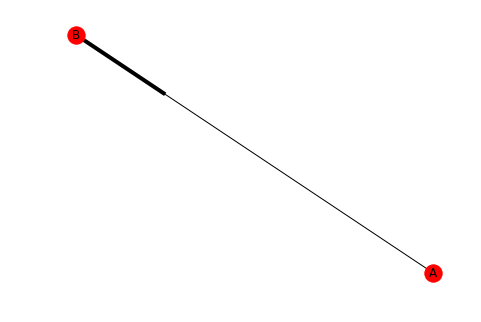

In [17]:
nx.draw(m_learned.dpd_graph, with_labels=True)
plt.show()

In [18]:
scoreBic(gms, sampled_data)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Users\MOTALY\Desktop\pred\dev\GMEs_experiments\rtgemlib\learning.py:24: PerformanceWarning: indexing past lexsort depth may impact performance.
  lambda lm: data_idx.loc[(lm['event'], lm[lambda_col])].shape[0], axis=1)


-288.52978662826166

In [19]:
list(gms.dpd_graph.edges.data())

[('B', 'B', {'timescales': [[5, 6]]}),
 ('B', 'A', {'timescales': [[2, 3]]}),
 ('A', 'B', {'timescales': [[1, 2]]})]

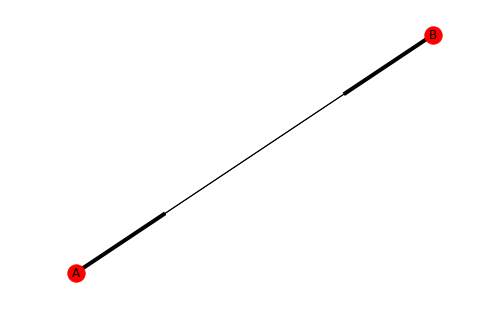

In [20]:
nx.draw(gms.dpd_graph, with_labels=True)
plt.show()